In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Loading the dataset**

In [5]:
df = pd.read_csv(r"/content/Indian_Kids_Screen_Time.csv")
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


**2.check for null values**

In [6]:
df.isnull().sum()


,0
Age,0
Gender,0
Avg_Daily_Screen_Time_hr,0
Primary_Device,0
Exceeded_Recommended_Limit,0
Educational_to_Recreational_Ratio,0
Health_Impacts,3218
Urban_or_Rural,0


**3. checking Duplicate values**

In [7]:
print("Number of duplicate rows:", df.duplicated().sum())
print("Number of duplicate columns:", df.columns.duplicated().sum())


Number of duplicate rows: 44
Number of duplicate columns: 0


**4. check Correlation**

In [9]:
df.corr(numeric_only=True)

,Age,Avg_Daily_Screen_Time_hr,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio
Age,1.000000,0.118328,0.159173,-0.488617
Avg_Daily_Screen_Time_hr,0.118328,1.000000,0.664950,-0.087552
Exceeded_Recommended_Limit,0.159173,0.664950,1.000000,-0.126643
Educational_to_Recreational_Ratio,-0.488617,-0.087552,-0.126643,1.000000


**5. check info of columns**

In [10]:
print("Number of columns:", df.shape[1])
print("Number of rows:", df.shape[0])

Number of columns: 8
Number of rows: 9712


**6. check datatype of columns**

In [11]:
print(df.dtypes)

Age                                    int64
Gender                                object
Avg_Daily_Screen_Time_hr             float64
Primary_Device                        object
Exceeded_Recommended_Limit              bool
Educational_to_Recreational_Ratio    float64
Health_Impacts                        object
Urban_or_Rural                        object
dtype: object


**7. IQR**

In [12]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"Column: {col}")
    print(f"Q1 (25th percentile): {Q1}")
    print(f"Q3 (75th percentile): {Q3}")
    print(f"IQR: {IQR}\n")

Column: Age
Q1 (25th percentile): 10.0
Q3 (75th percentile): 16.0
IQR: 6.0

Column: Avg_Daily_Screen_Time_hr
Q1 (25th percentile): 3.41
Q3 (75th percentile): 5.38
IQR: 1.9699999999999998

Column: Educational_to_Recreational_Ratio
Q1 (25th percentile): 0.37
Q3 (75th percentile): 0.48
IQR: 0.10999999999999999



In [17]:
df.describe()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


**8. heatmap**

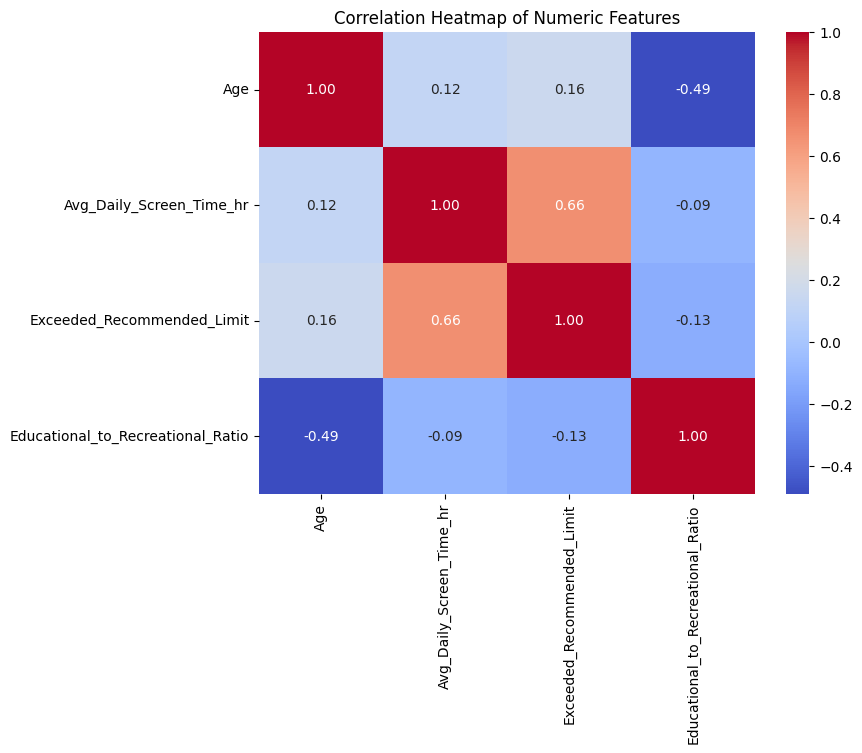

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

**understandings :**



1. **Loading Dataset**  
   - The dataset is loaded and first 5 rows are shown.  
   - We can see columns like Age, Gender, Screen Time, Device, Health Impacts, etc.  

2. **Checking Null Values**  
   - Most columns have no missing values.  
   - Only **Health_Impacts column has 3218 missing values**.  

3. **Checking Duplicate Rows and Columns**  
   - There are **44 duplicate rows** in the dataset.  
   - There are **no duplicate columns**.  

4. **Correlation**  
   - Correlation is checked only for numeric columns.  
   - **Screen Time and Exceeded Limit are strongly related (0.66)**.  
   - **Age and Educational Ratio are negatively related (-0.48)** → older kids spend less time on educational use.  

5. **Shape of Dataset**  
   - The dataset has **9712 rows** and **8 columns**.  

6. **Data Types**  
   - Numeric: Age, Screen Time, Educational Ratio.  
   - Categorical: Gender, Device, Health Impacts, Urban/Rural.  
   - Boolean: Exceeded_Recommended_Limit.  

7. **IQR (Interquartile Range)**  
   - Age: Middle 50% kids are between **10–16 years**.  
   - Screen Time: Middle 50% kids spend **3.4–5.3 hours daily**.  
   - Educational Ratio: Middle 50% kids spend **37%–48% time on educational content**.  

8. **Descriptive Statistics**  
   - Average Age = **13 years**.  
   - Average Screen Time = **4.3 hours/day** (above healthy limit).  
   - Maximum Screen Time = **13.8 hours/day** (very high).  
   - Average Educational Ratio = **0.42 (42%)**.  
9. **Heatmap (Correlation Visualization)**  
   - The heatmap visually shows the correlation between numeric features.  
   - Dark red = strong positive correlation, dark blue = strong negative correlation, light colors = weak correlation.  
   - This makes it easier to see which variables are related, compared to reading only numbers.
   


